In [1]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for data splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#for the model prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
data_dir = './dataset anemia/'
file1    = data_dir+'India/IndiaRd.xlsx'
file2    = data_dir+'Italy/Italyrd.xlsx'

In [4]:
d1 = pd.read_excel(file1)
d1["Anemia"] = d1["Note"]
d1 = d1[["Hgb", "Gender", "Age", "Anemia" ]]
d2 = pd.read_excel(file2)[["Hgb", "Gender", "Age", "Anemia" ]]
data = pd.concat([d1, d2])
data.head(3)

,Hgb,Gender,Age,Anemia
0,12.2,M,29,No Anemia
1,8.0,F,36,Anemia
2,10.7,F,30,Anemia


In [5]:
len(data)

218

In [6]:
data.replace("No anemia", "No Anemia", inplace=True)
data['Hgb'] = [float(i.replace(",", ".")) if type(i) is str else float(i) for i in list(data['Hgb']) ]

In [7]:
data.dropna(inplace=True)

In [8]:
list(data.columns)

['Hgb', 'Gender', 'Age', 'Anemia']

In [9]:
data.shape

(217, 4)

In [10]:
unique_values   = list(data['Anemia'].unique())
enum            = {val:i for i, val in enumerate(unique_values)} 
print(enum)

{'No Anemia': 0, 'Anemia': 1}


In [11]:
data['Anemia'].replace(enum, inplace=True)

data.head()

,Hgb,Gender,Age,Anemia
0,12.2,M,29,0
1,8.0,F,36,1
2,10.7,F,30,1
3,8.3,F,39,1
4,7.8,F,29,1


In [12]:
unique_values   = list(data['Gender'].unique())
enum            = {val:i for i, val in enumerate(unique_values)} 
print(enum)

{'M': 0, 'F': 1}


In [13]:
data['Gender'].replace(enum, inplace=True)
data.head()

,Hgb,Gender,Age,Anemia
0,12.2,0,29,0
1,8.0,1,36,1
2,10.7,1,30,1
3,8.3,1,39,1
4,7.8,1,29,1


In [47]:
data.dtypes

Hgb       float64
Gender      int64
Age         int64
Anemia      int64
dtype: object

# Data Analysis

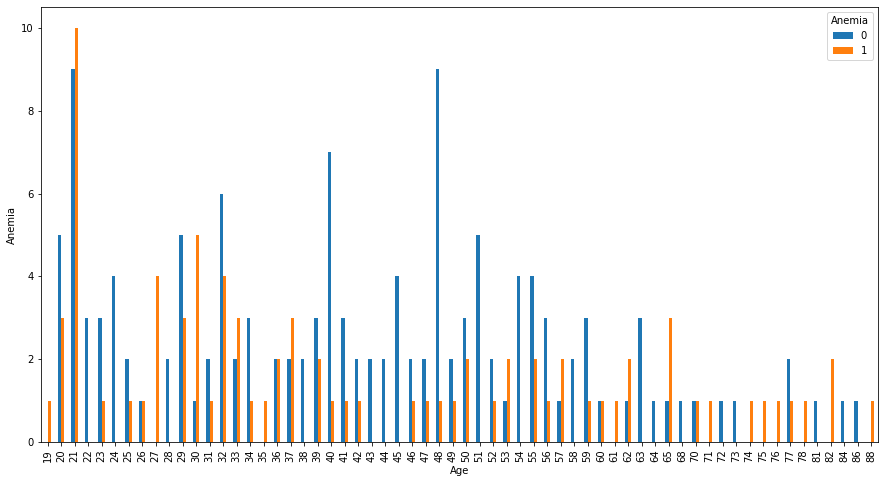

In [48]:

pd.crosstab(data.Age,data.Anemia).plot(kind="bar",figsize=(15,8))
#plt.title('Heart Disease Frequency for Age Span in dataset')
plt.xlabel('Age')
plt.ylabel('Anemia')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

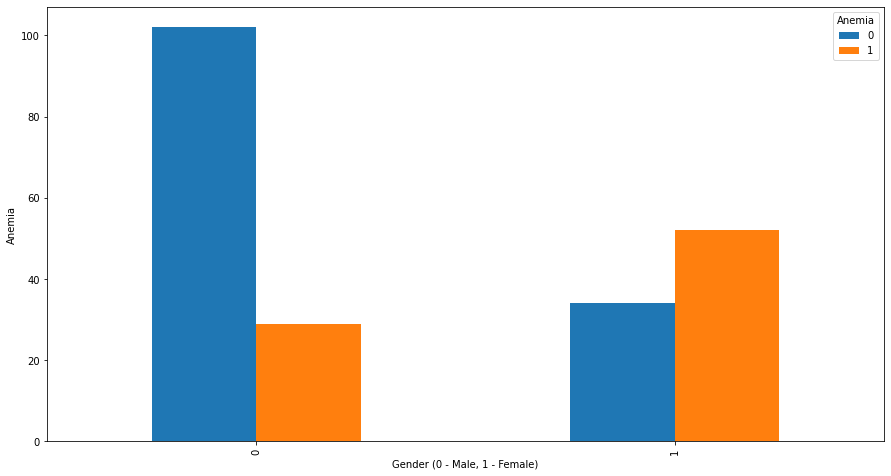

In [15]:
#Relation of heart disease with chest_pain_type. Here the chest_pain_type 2 has highest chance to have heart disease
pd.crosstab(data.Gender,data.Anemia).plot(kind="bar",figsize=(15,8))
#plt.title('Heart Disease Frequency for different types of chest pain')
plt.xlabel('Gender (0 - Male, 1 - Female)')
#plt.xticks(rotation=0)
#plt.legend(["Patient do not Have Disease", "Patient Have Disease"])
plt.ylabel('Anemia')
#plt.savefig('heartDiseaseAndchestPain.png')
plt.show()

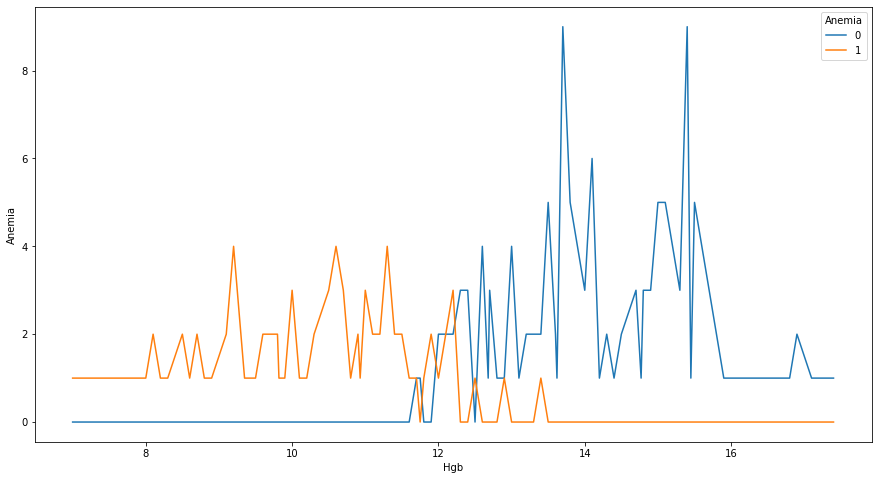

In [50]:
#Relation of heart disease with sex
pd.crosstab(data.Hgb,data.Anemia).plot(kind="line",figsize=(15,8))
#plt.title('Heart Disease Frequency for Sex(Male/Female)')
plt.xlabel('Hgb')
#plt.xticks(rotation=0)
#plt.legend(["Patient do not Have Disease", "Patient Have Disease"])
plt.ylabel('Anemia')
#plt.savefig('heartDiseaseAndSex.png')
plt.show()

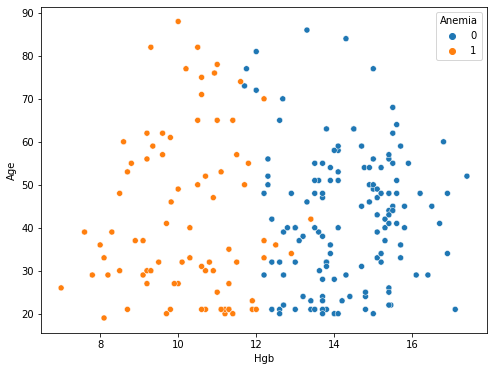

In [51]:
# Relation between Hgb and Age with chances of target either 0 or 1
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hgb',y='Age',data=data,hue='Anemia')
#plt.savefig('chMaxHeartCorr.png')
plt.show()

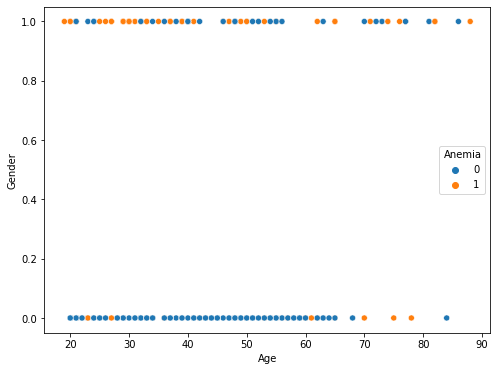

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Gender', data=data, hue='Anemia')
#plt.savefig('AgeChCorr.png')
plt.show()

# Training

In [ ]:
len(data['Anemia'].unique())

In [54]:
Y = data['Anemia']
data.drop(columns=['Anemia'], inplace=True)
X = np.array(data)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [57]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.7, random_state=123)
print('Training Samples: '+str(len(X_train)) + ' \n Test Samples: ' + str(len(X_test)))

Training Samples: 151 
 Test Samples: 66


## Tf Model

In [107]:
X_train.shape

(151, 3)

In [108]:
set(Y_train)

{0, 1}

In [109]:
import tensorflow as tf



In [120]:
model =   tf.keras.models.Sequential([
                            tf.keras.layers.Dense(128, input_shape=(None, X_train.shape[1]), activation='relu'),
                            tf.keras.layers.Dense(56,  activation='relu'),
                            tf.keras.layers.Dense(2)
                            ])

In [121]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

In [122]:
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6093
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.8212
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5887 - accuracy: 0.8079
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5484 - accuracy: 0.8013
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8013
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.8013
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.7815
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8013
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8344
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8543
Epoch 11/50
5/5 [======================

In [123]:
res = model.evaluate(X_test, Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.1185 - accuracy: 0.9697


In [ ]:
res

[0.42827439308166504, 0.8131868243217468]

## SVM

In [61]:
param_grid = {'C':[2**1], 'gamma':[0.1, 10], 'kernel':['poly']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9735099337748344
Testing Score: 0.9393939393939394


In [62]:
gridSVM.best_params_

{'C': 2, 'gamma': 10, 'kernel': 'poly'}

In [63]:
param_grid = {'C':[0.5, 2**1, 2**2, 2**3 ], 'gamma':[0.1, 2, 10, 100], 'kernel':['poly']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9602649006622517
Testing Score: 0.9848484848484849


In [64]:
gridSVM.best_params_

{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}

In [65]:
param_grid = {'C':[0.5, 2**1, 2**2, 2**3, 2**4, 2**5 ], 'gamma':[0.01, 0.1, 2, 10, 100], 'kernel':['poly']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9602649006622517
Testing Score: 0.9848484848484849


In [66]:
gridSVM.best_params_

{'C': 0.5, 'gamma': 2, 'kernel': 'poly'}

In [67]:
param_grid = {'C':[0.5, 2**1, 2**2, 2**3, 2**4, 2**5, 2**6, 2**8 ], 'gamma':[0.01, 0.1, 2, 10, 100], 'kernel':['poly', 'linear', 'rbf', 'sigmoid']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9668874172185431
Testing Score: 0.9696969696969697


In [68]:
gridSVM.best_params_

{'C': 2, 'gamma': 10, 'kernel': 'rbf'}

In [69]:
param_grid = {'C':[0.5, 2**1, 2**2, 2**3 ], 'gamma':[0.1, 2, 10, 100], 'kernel':['linear']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9536423841059603
Testing Score: 0.9696969696969697


In [70]:
gridSVM.best_params_

{'C': 4, 'gamma': 0.1, 'kernel': 'linear'}

In [71]:
param_grid = {'C':[0.5, 2**1, 2**2, 2**3 ], 'gamma':[0.1, 2, 10, 100], 'kernel':['sigmoid']}
gridSVM = GridSearchCV(SVC(), param_grid=param_grid, cv = 5)

#gridSVM = SVC(C=2, gamma=0.1, kernel='poly')
gridSVM.fit(X_train, Y_train)

print('Training Score: ' + str(gridSVM.score(X_train, Y_train)))
print("Testing Score: " + str(gridSVM.score(X_test, Y_test)))

Training Score: 0.9403973509933775
Testing Score: 0.9393939393939394


In [72]:
gridSVM.best_params_

{'C': 8, 'gamma': 0.1, 'kernel': 'sigmoid'}

## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier


In [74]:
model = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9242424242424242

In [75]:
knnAlgos = ['auto', 'ball_tree', 'kd_tree', 'brute']

model = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm=knnAlgos[3], leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9242424242424242

In [76]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='ball_tree', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9545454545454546

In [77]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9696969696969697

In [78]:
model = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9848484848484849

In [79]:
model = KNeighborsClassifier(n_neighbors=21, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8787878787878788

In [80]:
model = KNeighborsClassifier(n_neighbors=21, weights='uniform', algorithm='kd_tree', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8787878787878788

In [81]:
model = KNeighborsClassifier(n_neighbors=61, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric_params=None, n_jobs=-1)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6666666666666666

In [82]:
# Grid Search
param_grid = {'n_neighbors':[1, 3, 5, 21, 61], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
gridKNN.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 21, 61]})

In [83]:
gridKNN.score(X_test, Y_test)

0.9242424242424242

In [84]:
gridKNN.best_score_

0.9466666666666667

In [85]:
gridKNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

# Random Forest

In [86]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=10)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


In [87]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=20)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9545454545454546


In [88]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=30)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


In [89]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=50)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


In [90]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=500)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9848484848484849


In [91]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=700)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


In [92]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=1000)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


In [93]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=1200)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9848484848484849


In [94]:
param_grid = {'n_estimators':[1500, 1800, 2000]}
#gridRFT = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)
gridRFT = RandomForestClassifier(n_estimators=3500)
gridRFT.fit(X_train, Y_train)

print('Training Score: ' + str(gridRFT.score(X_train, Y_train)))
print("Testing Score: " + str(gridRFT.score(X_test, Y_test)))

Training Score: 1.0
Testing Score: 0.9696969696969697


# MLP

In [95]:
from sklearn.neural_network import MLPClassifier


In [96]:

grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
gridMLP = GridSearchCV(MLPClassifier(), param_grid=grid_params, cv=5)
gridMLP.fit(X_train, Y_train)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\skle

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWa

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWa

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\skle

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\H P\Envs\mldsenv\lib\site-packages\skle

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), 100, (50, 100)],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [98]:
gridMLP.best_score_

0.96

In [99]:
gridMLP.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (50, 100), 'solver': 'adam'}

In [100]:
mlpCls = MLPClassifier(hidden_layer_sizes=(100,), activation='identity', solver='adam' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8333333333333334

In [101]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='adam' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7878787878787878

In [102]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

0.7272727272727273

In [103]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='lbfgs' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.9696969696969697

In [104]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(50,), activation='identity', solver='adam' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.7424242424242424

In [105]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(200,), activation='identity', solver='adam' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9242424242424242

In [106]:
# grid_params = {'hidden_layer_sizes':[(50,), (100), (50, 100,)], 'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'] }
mlpCls = MLPClassifier(hidden_layer_sizes=(50, 100,), activation='identity', solver='adam' )
mlpCls.fit(X_train, Y_train)
mlpCls.score(X_test, Y_test)

C:\Users\H P\Envs\mldsenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9696969696969697